# Import all the required libraries

---



In [62]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [63]:


START = "2020-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [64]:
data = load_data('GOOG')
df=data
df.head()
df.shape[0]


[*********************100%%**********************]  1 of 1 completed


1133

In [65]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,67.077499,68.406998,67.077499,68.368500,28132000
1,67.392998,68.625000,67.277199,68.032997,23728000
2,67.500000,69.824997,67.500000,69.710503,34646000
3,69.897003,70.149498,69.518997,69.667000,30054000
4,69.603996,70.579002,69.542000,70.216003,30560000


Visualizing Closing Price

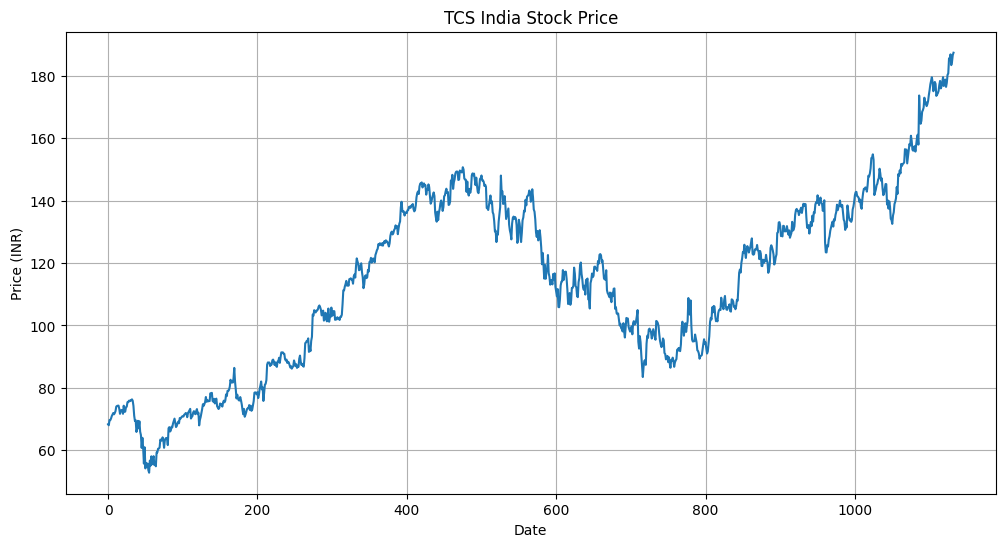

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [67]:
df

,Open,High,Low,Close,Volume
0,67.077499,68.406998,67.077499,68.368500,28132000
1,67.392998,68.625000,67.277199,68.032997,23728000
2,67.500000,69.824997,67.500000,69.710503,34646000
3,69.897003,70.149498,69.518997,69.667000,30054000
4,69.603996,70.579002,69.542000,70.216003,30560000
...,...,...,...,...,...
1128,185.645004,187.500000,185.449997,186.860001,13025700
1129,185.720001,186.580002,183.324997,183.419998,23032400
1130,184.479996,185.339996,182.729996,184.490005,11815900
1131,183.470001,186.949997,183.059998,186.610001,12555500


# Plotting moving averages of 100 day

---



In [68]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1128    159.976499
1129    160.361400
1130    160.752200
1131    161.151500
1132    161.553200
Name: Close, Length: 1133, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

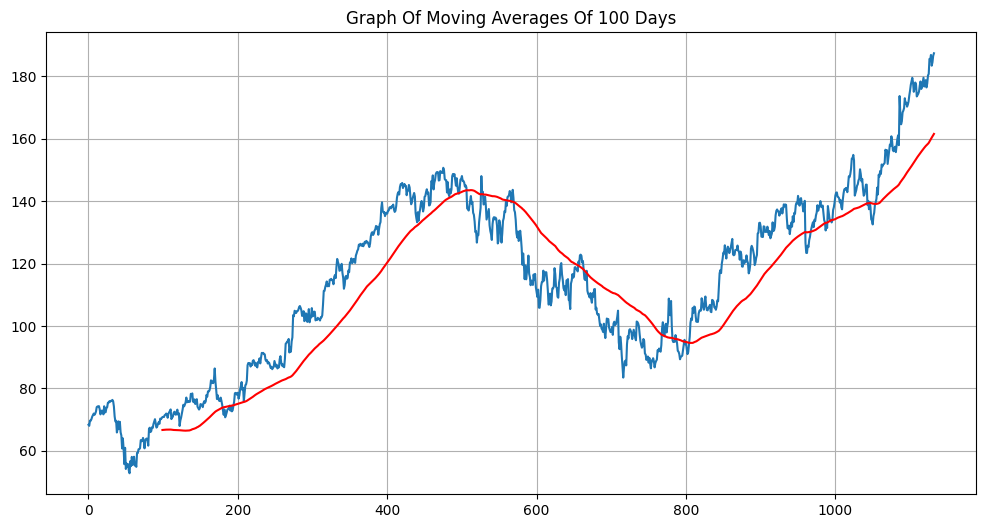

In [69]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [70]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1128    148.84965
1129    149.08640
1130    149.32135
1131    149.55945
1132    149.80490
Name: Close, Length: 1133, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

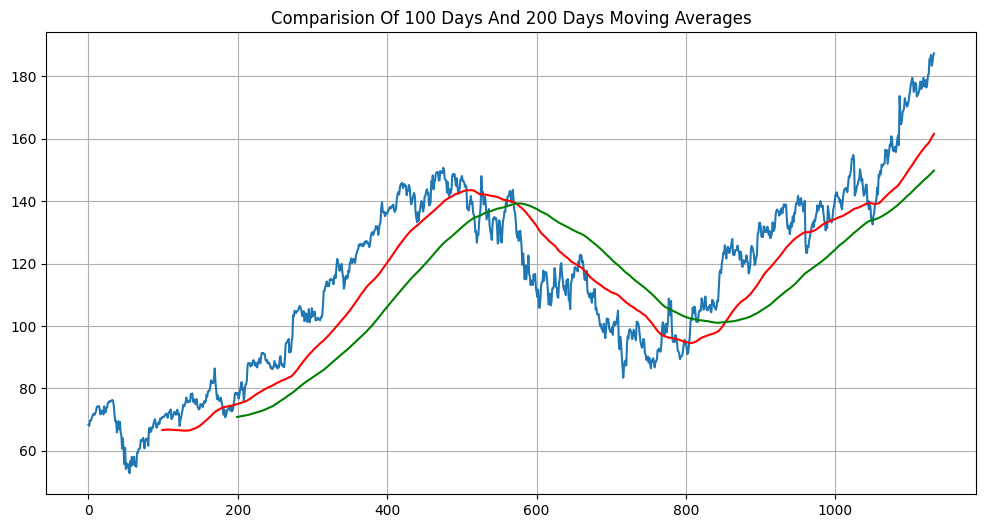

In [71]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [72]:
df.shape

(1133, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [73]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(793, 7)
(340, 7)


In [74]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,67.077499,68.406998,67.077499,68.368500,68.290787,28132000
1,2020-01-03,67.392998,68.625000,67.277199,68.032997,67.955666,23728000
2,2020-01-06,67.500000,69.824997,67.500000,69.710503,69.631264,34646000
3,2020-01-07,69.897003,70.149498,69.518997,69.667000,69.587814,30054000
4,2020-01-08,69.603996,70.579002,69.542000,70.216003,70.136192,30560000


In [75]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
793,2023-02-27,90.089996,90.449997,89.610001,90.099998,89.997589,22724300
794,2023-02-28,89.540001,91.449997,89.519997,90.300003,90.197365,30546900
795,2023-03-01,90.160004,91.199997,89.849998,90.510002,90.407120,26323900
796,2023-03-02,89.860001,92.480003,89.769997,92.309998,92.205070,23328600
797,2023-03-03,92.739998,94.110001,92.660004,94.019997,93.913124,30242500


# Using MinMax scaler for normalization of the dataset

---



In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [77]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [78]:
data_training_array = scaler.fit_transform(train_close)


In [79]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [80]:
x_train.shape

(693, 100, 1)

# ML Model (LSTM)

---



In [81]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [82]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [83]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

# Training the model

---



In [84]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
22/22 [==============================] - 15s 411ms/step - loss: 0.1295 - mean_absolute_error: 0.2711
Epoch 2/100
22/22 [==============================] - 11s 485ms/step - loss: 0.0213 - mean_absolute_error: 0.1180
Epoch 3/100
22/22 [==============================] - 11s 491ms/step - loss: 0.0174 - mean_absolute_error: 0.1040
Epoch 4/100
22/22 [==============================] - 11s 487ms/step - loss: 0.0183 - mean_absolute_error: 0.1044
Epoch 5/100
22/22 [==============================] - 12s 534ms/step - loss: 0.0162 - mean_absolute_error: 0.0980
Epoch 6/100
22/22 [==============================] - 9s 429ms/step - loss: 0.0145 - mean_absolute_error: 0.0922
Epoch 7/100
22/22 [==============================] - 10s 445ms/step - loss: 0.0144 - mean_absolute_error: 0.0927
Epoch 8/100
22/22 [==============================] - 11s 490ms/step - loss: 0.0140 - mean_absolute_error: 0.0896
Epoch 9/100
22/22 [==============================] - 11s 485ms/step - loss: 0.0139 - mean_absolut

In [85]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [86]:
test_close.shape

(340, 1)

In [87]:
past_100_days = pd.DataFrame(train_close[-100:])

In [88]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [89]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)
# Use pd.concat to combine DataFrames instead of the deprecated .append method

In [90]:
final_df.head()

,0
0,99.300003
1,102.410004
2,102.220001
3,102.239998
4,99.570000


In [91]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.15216559],
       [0.18209822],
       [0.18026952],
       [0.18046198],
       [0.15476421],
       [0.14648702],
       [0.14013479],
       [0.14254095],
       [0.15611166],
       [0.13176133],
       [0.16641002],
       [0.17228105],
       [0.16169396],
       [0.16400386],
       [0.17314731],
       [0.187488  ],
       [0.20635228],
       [0.10904718],
       [0.08768047],
       [0.12598656],
       [0.10750727],
       [0.06746874],
       [0.03445623],
       [0.        ],
       [0.03089508],
       [0.04966317],
       [0.0521656 ],
       [0.03763237],
       [0.10279115],
       [0.12743027],
       [0.12069298],
       [0.14658328],
       [0.1491819 ],
       [0.14446585],
       [0.13772863],
       [0.11876808],
       [0.13320504],
       [0.14754573],
       [0.13580366],
       [0.12281041],
       [0.11501448],
       [0.17285851],
       [0.17122234],
       [0.16689128],
       [0.15765163],
       [0.13301251],
       [0.11222333],
       [0.100

In [92]:
input_data.shape

(440, 1)

# Testing the model

---



In [93]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [94]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(340, 100, 1)
(340,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [95]:
# Making predictions

y_pred = model.predict(x_test)

11/11 [==============================] - 2s 91ms/step


In [96]:
y_pred.shape

(340, 1)

In [97]:
y_test

array([0.06361887, 0.06554384, 0.06756501, 0.08488931, 0.10134744,
       0.11636192, 0.10279115, 0.10741101, 0.08825799, 0.07237733,
       0.07863336, 0.10356114, 0.12569783, 0.16920117, 0.18257941,
       0.17747837, 0.21511067, 0.1995188 , 0.21915307, 0.2172281 ,
       0.18835418, 0.17199232, 0.17718964, 0.17160733, 0.19740137,
       0.20615982, 0.20818099, 0.20654474, 0.24456211, 0.22579402,
       0.21780563, 0.20914344, 0.23772863, 0.24995188, 0.22069297,
       0.20818099, 0.20721846, 0.21568819, 0.21578446, 0.22415785,
       0.2032724 , 0.20173242, 0.23946106, 0.23801735, 0.23310877,
       0.21645818, 0.21780563, 0.20904717, 0.21871991, 0.23820981,
       0.23532247, 0.27709336, 0.32155922, 0.33137632, 0.32213668,
       0.35226177, 0.36564009, 0.38527428, 0.38267566, 0.40789225,
       0.38306066, 0.36717999, 0.39326275, 0.40365738, 0.39605391,
       0.38383065, 0.39345529, 0.40173248, 0.41520692, 0.42752652,
       0.37969205, 0.37709336, 0.37901833, 0.39326275, 0.39403

In [98]:
y_pred

array([[0.21369338],
       [0.21035936],
       [0.20728002],
       [0.20459579],
       [0.20257731],
       [0.20152266],
       [0.20161775],
       [0.20259959],
       [0.2041454 ],
       [0.20579581],
       [0.20710967],
       [0.20795728],
       [0.20862755],
       [0.2095721 ],
       [0.21134686],
       [0.21392107],
       [0.21679735],
       [0.21975729],
       [0.22267914],
       [0.22553834],
       [0.22831258],
       [0.23083243],
       [0.2330339 ],
       [0.23489943],
       [0.23643674],
       [0.23773006],
       [0.23888806],
       [0.23999415],
       [0.24109241],
       [0.24228173],
       [0.24358805],
       [0.24497606],
       [0.24638197],
       [0.24781504],
       [0.24932154],
       [0.25086346],
       [0.25236148],
       [0.25362206],
       [0.25452343],
       [0.2550716 ],
       [0.255411  ],
       [0.25548136],
       [0.25525376],
       [0.2550443 ],
       [0.2550887 ],
       [0.2554432 ],
       [0.25594002],
       [0.256

In [99]:
scaler.scale_

array([0.00962464])

In [100]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

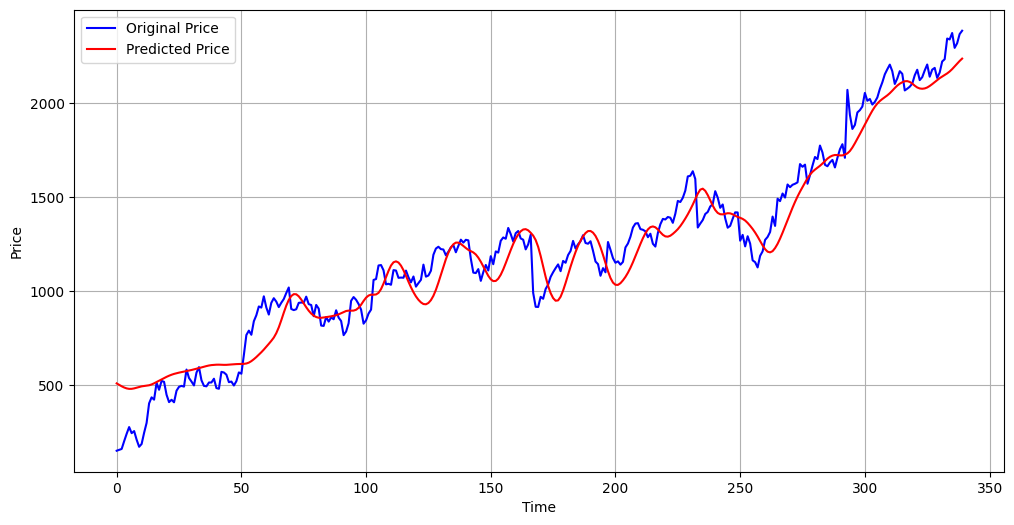

In [101]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [102]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 8.15%


Calculation of R2 score

In [103]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9410432100622996


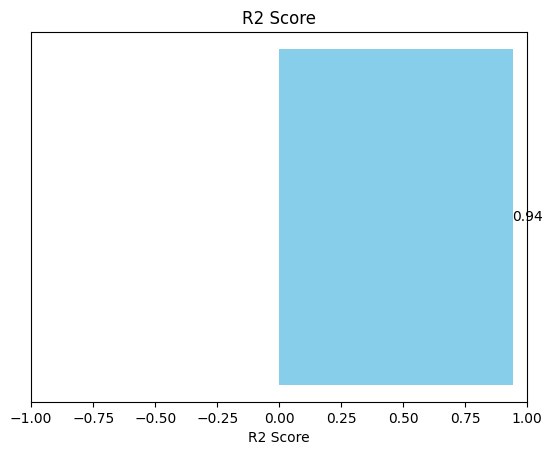

In [104]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

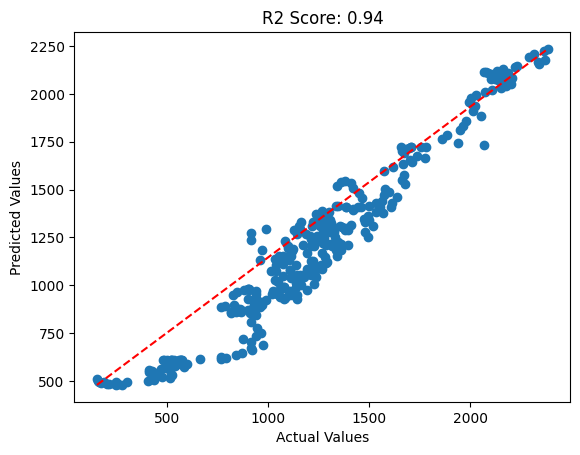

In [105]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()